In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import perf_counter

In [8]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)
print(x.head())
print(y.head())
print(x.shape, y.shape)

          0         1         2         3         4
0  0.071841  0.855352 -0.305597  0.028253  1.826895
1  0.139521 -0.423507  0.461059 -0.447400 -0.034988
2  1.626311 -0.257622 -0.697520  1.413219  1.086292
3 -1.183233 -0.826343  0.073047 -0.639690 -0.503273
4 -0.783365 -0.861232  0.951448 -0.117306  0.680597
            0
0   63.320498
1  -23.426394
2   11.982771
3 -102.883304
4  -49.373475
(387, 5) (387, 1)


In [10]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_

array([[95.52010745]])

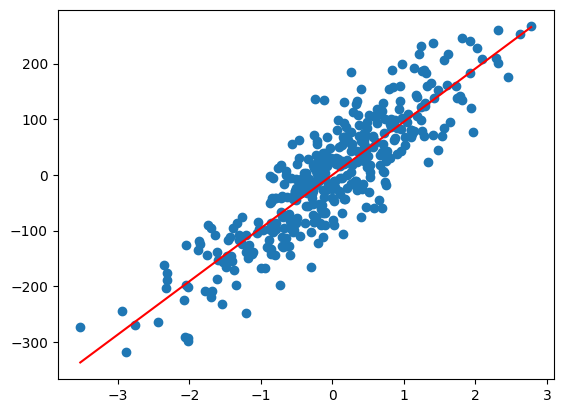

In [13]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [16]:
binary.score(x[1].to_frame(), y)

0.7699743283650629

In [17]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

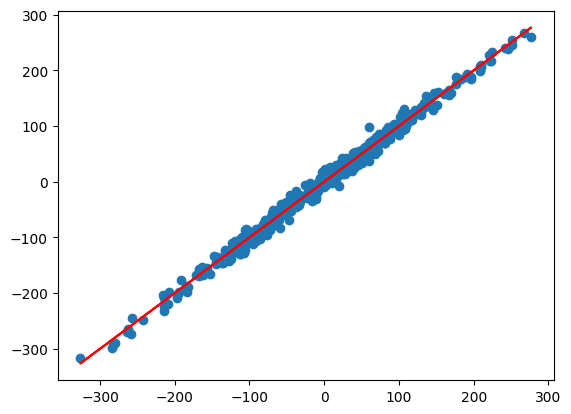

In [18]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

# EXTRA TASKS

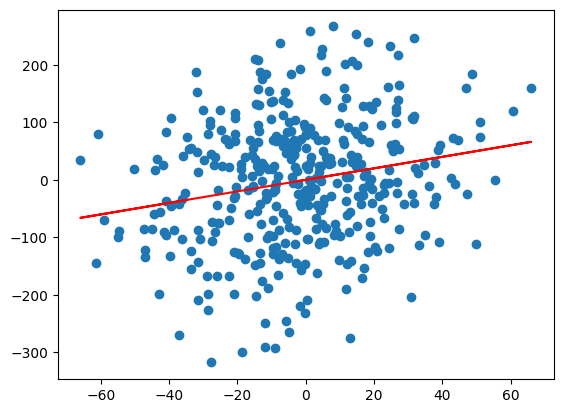

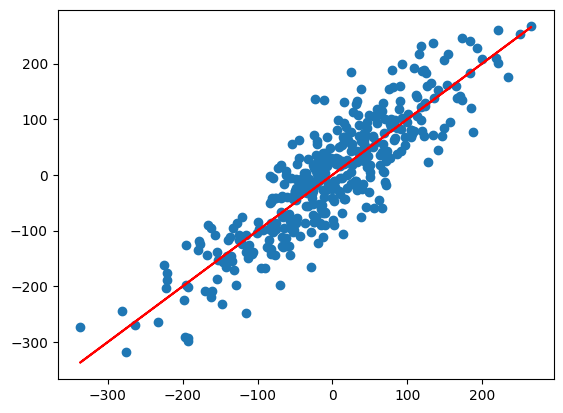

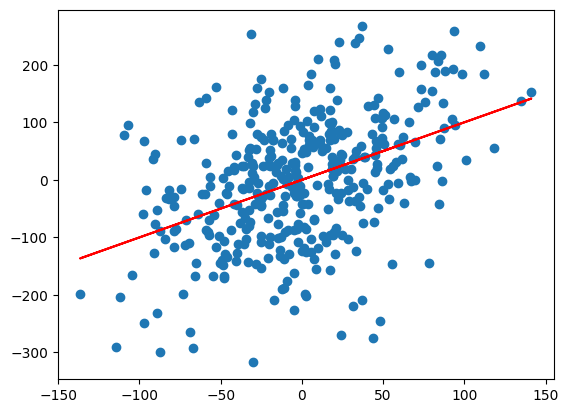

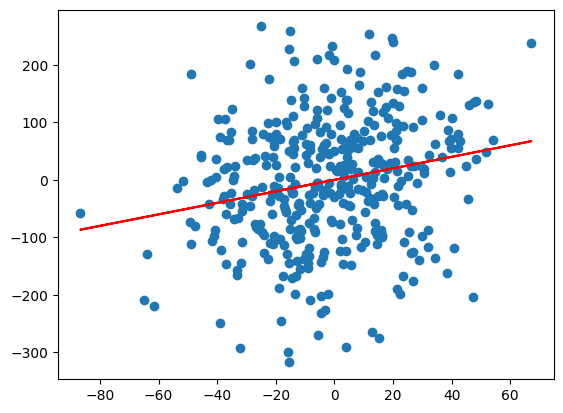

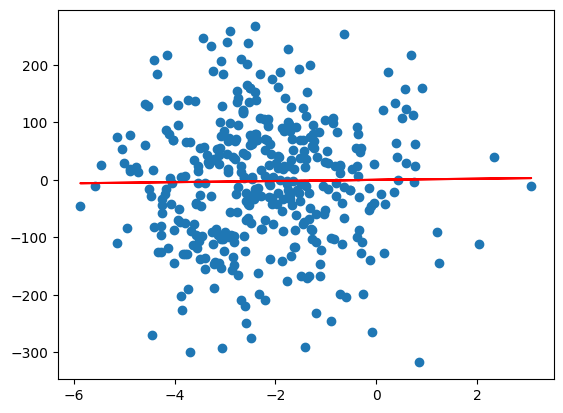

In [20]:
for i in range(5):
    binary = LinearRegression()
    binary.fit(x[[i]], y)
    yy = binary.predict(x[[i]])
    plt.scatter(yy, y)
    plt.plot(yy, yy, c='r')
    plt.show()

# 2

In [21]:
import numpy as np
import pandas as pd

class Model(object):
    def __init__(self, b0=1.0, b=None):
        self.b0 = b0
        self.b = b
        self.threshold = 1e-6

    def _to_matrix(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        else:
            X = np.asarray(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return X

    def _to_vector(self, Y):
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
        if isinstance(Y, pd.Series):
            return Y.values
        return np.asarray(Y).ravel()

    def predict(self, X):
        X = self._to_matrix(X)
        if self.b is None:
            self.b = np.zeros(X.shape[1])
        return self.b0 + X.dot(self.b)

    def error(self, X, Y):
        X = self._to_matrix(X)
        Y = self._to_vector(Y)
        diff = self.predict(X) - Y
        return np.sum(diff ** 2) / (2 * len(Y))

    def fit(self, X, Y, alpha=0.001, max_steps=5000,
            autobreak=False, adaptive_alpha=False):
        X = self._to_matrix(X)
        Y = self._to_vector(Y)
        m, n = X.shape

        if self.b is None:
            self.b = np.zeros(n)

        steps = []
        errors = []
        start_step = 0

        if adaptive_alpha:
            base_b0 = self.b0
            base_b = self.b.copy()
            y_pred = base_b0 + X.dot(base_b)
            base_error = np.sum((y_pred - Y) ** 2) / (2 * m)

            alpha = 1.0

            diff = y_pred - Y
            grad0 = np.mean(diff)
            grad = X.T.dot(diff) / m

            while True:
                self.b0 = base_b0
                self.b = base_b.copy()

                self.b0 -= alpha * grad0
                self.b  -= alpha * grad

                y_trial = self.b0 + X.dot(self.b)
                new_err = np.sum((y_trial - Y) ** 2) / (2 * m)

                if new_err <= base_error:
                    steps.append(1)
                    errors.append(new_err)
                    start_step = 1
                    break

                alpha /= 2.0
                if alpha < 1e-6:
                    self.b0 = base_b0
                    self.b = base_b
                    return steps, errors

        for step in range(start_step, max_steps):
            y_pred = self.b0 + X.dot(self.b)
            diff = y_pred - Y

            grad0 = np.mean(diff)
            grad = X.T.dot(diff) / m

            self.b0 -= alpha * grad0
            self.b  -= alpha * grad

            y_pred = self.b0 + X.dot(self.b)
            new_err = np.sum((y_pred - Y) ** 2) / (2 * m)
            steps.append(step + 1)
            errors.append(new_err)

            if len(errors) >= 2 and autobreak:
                if abs(errors[-1] - errors[-2]) < self.threshold:
                    break

        return steps, errors

model = Model()
steps, errors = model.fit(x, y, adaptive_alpha=True, max_steps=5000)
print(model.b0, model.b)

0.5649835377652658 [15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]


# 3

Feature=0  degree=2  MSE=11491.9
Feature=0  degree=3  MSE=11490.8
Feature=0  degree=10  MSE=11411.6


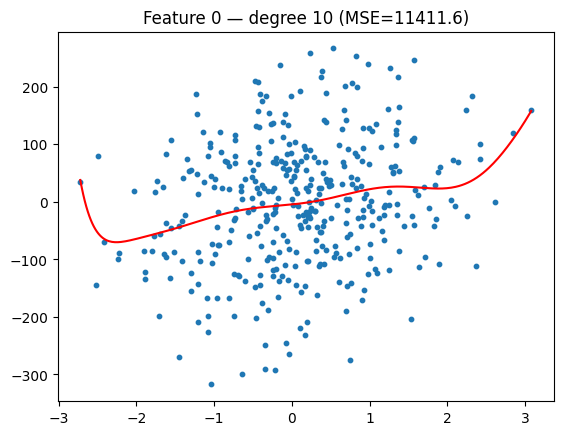

Feature=1  degree=2  MSE=2763.91
Feature=1  degree=3  MSE=2750.4
Feature=1  degree=10  MSE=2731.67


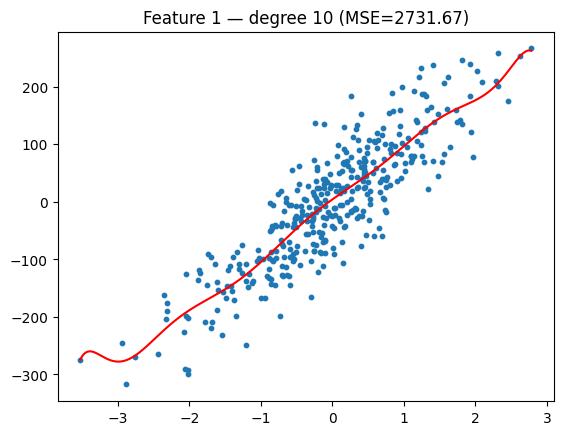

Feature=2  degree=2  MSE=9733.43
Feature=2  degree=3  MSE=9699.86
Feature=2  degree=10  MSE=9560.37


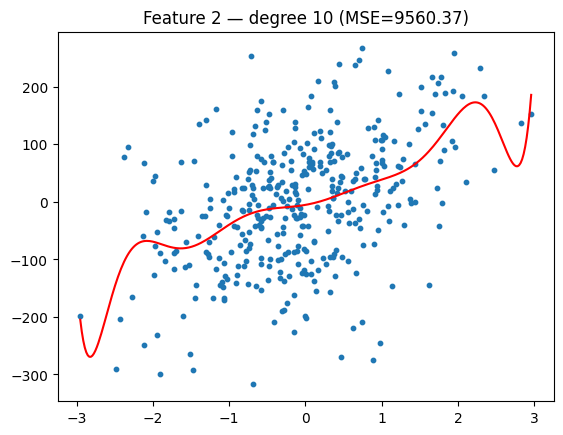

Feature=3  degree=2  MSE=11440.6
Feature=3  degree=3  MSE=11412.1
Feature=3  degree=10  MSE=11143.5


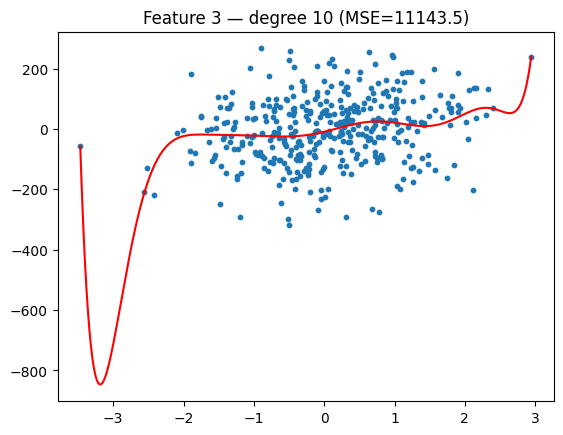

Feature=4  degree=2  MSE=12004.1
Feature=4  degree=3  MSE=12003.9
Feature=4  degree=10  MSE=11475.3


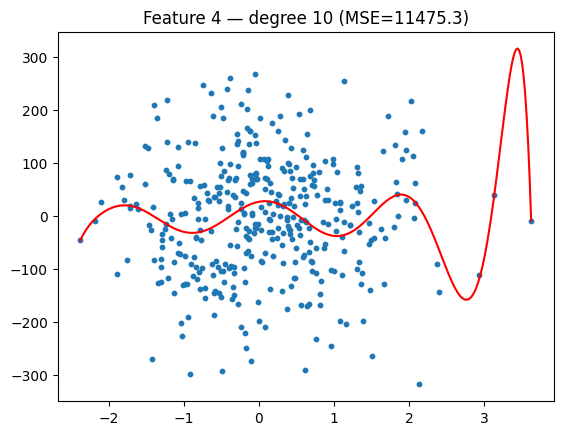

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

results = {}

for col in x.columns:
    Xcol = x[[col]]
    results[col] = {}
    for deg in (2, 3, 10):
        model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=True),
                               LinearRegression())
        model.fit(Xcol, y)
        y_pred = model.predict(Xcol)
        mse = mean_squared_error(y, y_pred)
        results[col][deg] = {'model': model, 'mse': mse}
        print(f'Feature={col}  degree={deg}  MSE={mse:.6g}')

    # optional: plot degree-3 fit
    xx = np.linspace(Xcol.values.min(), Xcol.values.max(), 300).reshape(-1, 1)
    yy = results[col][10]['model'].predict(xx)
    plt.figure()
    plt.scatter(Xcol, y, s=10)
    plt.plot(xx, yy, c='r')
    plt.title(f'Feature {col} — degree 10 (MSE={results[col][10]["mse"]:.6g})')
    plt.show()

degree 10 are clearly overfitting

# 4

In [28]:
import pandas as pd

rows = []
for feat, degs in results.items():
    for deg, info in degs.items():
        rows.append({'feature': feat, 'degree': deg, 'mse': info['mse']})
df = pd.DataFrame(rows)

pivot = df.pivot(index='feature', columns='degree', values='mse').sort_index()
print(pivot.round(6).fillna('-').to_string())

degree             2             3             10
feature                                          
0        11491.909255  11490.787323  11411.586520
1         2763.909753   2750.401156   2731.672893
2         9733.431563   9699.859735   9560.372197
3        11440.588266  11412.119234  11143.475913
4        12004.093016  12003.905964  11475.314939


# 5

In [34]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

y_pred = multiple.predict(x)
y_true = np.ravel(y)
residuals = y_true - np.ravel(y_pred)
n = len(y_true)
p = x.shape[1]

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - np.ravel(y_pred)) / np.where(y_true==0, 1e-8, y_true))) * 100
r2 = r2_score(y_true, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE (%):", mape)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 93.49228960042413
RMSE: 9.669141099416438
MAE: 7.780683675008623
MAPE (%): 33.32620718825904
R2: 0.9922198026415868
Adjusted R2: 0.9921177003140486


# 6

In [35]:
from sklearn.utils import all_estimators


estimators = all_estimators(type_filter='regressor')
regression_estimators = []
i = 1
for name, class_ in estimators:
    regression_estimators.append(class_.__name__)
    print(f'{i}. {class_.__name__}')
    i += 1

1. ARDRegression
2. AdaBoostRegressor
3. BaggingRegressor
4. BayesianRidge
5. CCA
6. DecisionTreeRegressor
7. DummyRegressor
8. ElasticNet
9. ElasticNetCV
10. ExtraTreeRegressor
11. ExtraTreesRegressor
12. GammaRegressor
13. GaussianProcessRegressor
14. GradientBoostingRegressor
15. HistGradientBoostingRegressor
16. HuberRegressor
17. IsotonicRegression
18. KNeighborsRegressor
19. KernelRidge
20. Lars
21. LarsCV
22. Lasso
23. LassoCV
24. LassoLars
25. LassoLarsCV
26. LassoLarsIC
27. LinearRegression
28. LinearSVR
29. MLPRegressor
30. MultiOutputRegressor
31. MultiTaskElasticNet
32. MultiTaskElasticNetCV
33. MultiTaskLasso
34. MultiTaskLassoCV
35. NuSVR
36. OrthogonalMatchingPursuit
37. OrthogonalMatchingPursuitCV
38. PLSCanonical
39. PLSRegression
40. PassiveAggressiveRegressor
41. PoissonRegressor
42. QuantileRegressor
43. RANSACRegressor
44. RadiusNeighborsRegressor
45. RandomForestRegressor
46. RegressorChain
47. Ridge
48. RidgeCV
49. SGDRegressor
50. SVR
51. StackingRegressor
52. T

# 7

In [ ]:
col = x.columns[0]
for deg in (2, 3, 10):
    t1 = perf_counter()
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=True),
                            LinearRegression())
    model.fit(Xcol, y)
    y_pred = model.predict(Xcol)
    t2 = perf_counter()
    print(f'Feature={col}  degree={deg}  Time={t2 - t1:.4f} sec')

Feature=0  degree=2  Time=0.0063 sec
Feature=0  degree=3  Time=0.0052 sec
Feature=0  degree=10  Time=0.0042 sec
